## Plotting the Charts (index.html)

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import os

In [131]:
file = os.path.join('cases', 'all.ipynb')
%run '{file}'

### Confirmed Cases (Line Chart)

In [132]:
color_index = ['coral','goldenrod','green','teal','navy','grey','purple','crimson']

In [133]:
def linechart_global(df, output_file):

    # x-axis
    dates = df.columns.tolist()
    days = range(len(dates))

    # y-axis
    countries = df.index
    y = df.values.tolist()

    fig, ax = plt.subplots(figsize = (9,6))

    plt.xlabel('Days Since First Case', fontsize=14)
    xticks = [day*7 for day in days]
    xlabels = dates[0::7]
    plt.xticks(xticks, xlabels, rotation=45)
    plt.xlim(0, 84)
    plt.ylabel('Current Infections', fontsize=14)
    plt.yticks(np.arange(0, 500000, step=50000))
    plt.ylim(0, 500000)
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, p: format(int(y), ',')))

    counter = 0
    country_labels = ()

    ax.tick_params(axis='both', labelsize=14)

    for country in countries:
        ax.plot(days, y[counter], label=countries, color=color_index[counter], linewidth=2, linestyle='-')

        country_labels += (country,)
        counter += 1
        if counter == len(countries):
            break

    plt.legend(country_labels, loc='best')            
    plt.grid(axis='y')
    plt.savefig(output_file, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

#### Global

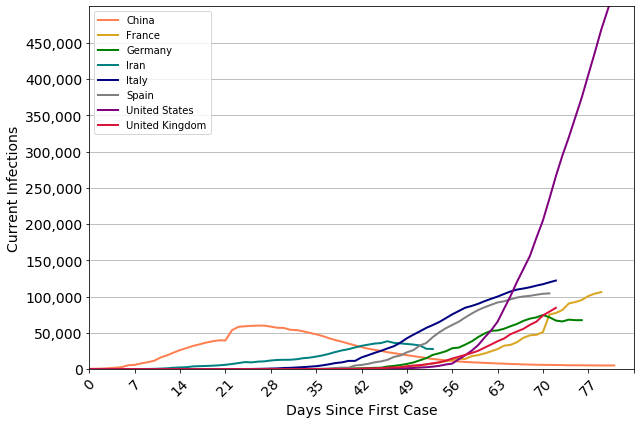

In [134]:
saved_img = os.path.join('..', 'images','chart2_global.png')

# linechart_global(first_confirmed_top, saved_img)
linechart_global(first_infected_top, saved_img)

#### By Country

In [135]:
def linechart_one(country):

    # x-axis
    dates = confirmed_df.columns.tolist()
    days = range(len(dates))

    # y-axis
    confirmed = confirmed_df.loc[confirmed_df.index == country].values[0]
    recovered = recovered_df.loc[recovered_df.index == country].values[0]
    fatalities = fatalities_df.loc[fatalities_df.index == country].values[0]
    
    fig, ax = plt.subplots(figsize = (9,6))

    xticks = [day*7 for day in days]
    xlabels = dates[0::7]
    plt.xticks(xticks, xlabels, rotation=45)
    plt.xlim(1, 80)
    # plt.yticks(np.arange(0, 500000, step=50000))
    plt.ylim(0, confirmed.max()+5000)
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, p: format(int(y), ',')))
    ax.tick_params(axis='both', labelsize=14)
    ax.set_axisbelow(True)
    plt.grid(axis='y', alpha=0.3)

    # Line plots
    ax.plot(days, confirmed, label='Confirmed', color='tomato', linestyle='-')
    ax.fill_between(days, recovered+fatalities, confirmed, color='tomato', alpha=0.7)
    
    ax.plot(days, recovered+fatalities, label='Recovered', color='teal', linestyle='-')
    ax.fill_between(days, fatalities, recovered+fatalities, color='teal', alpha=0.7)
    
    ax.plot(days, fatalities, label='Fatalities', linestyle='-')
    ax.fill_between(days, 0, fatalities, alpha=0.9)

    # Save image
    country = country.replace(' ', '').lower()
    saved_img = os.path.join('..', 'images',f'chart1_{country}.png')
    plt.savefig(saved_img, bbox_inches='tight')

    plt.tight_layout()
    plt.show()

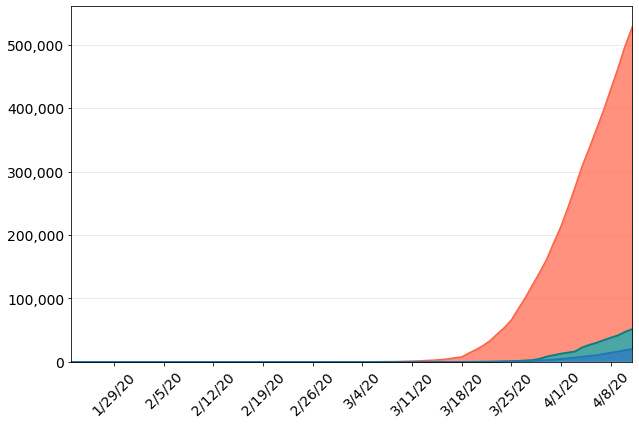

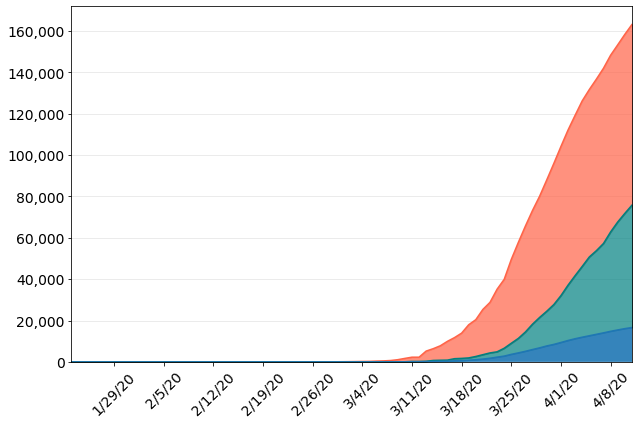

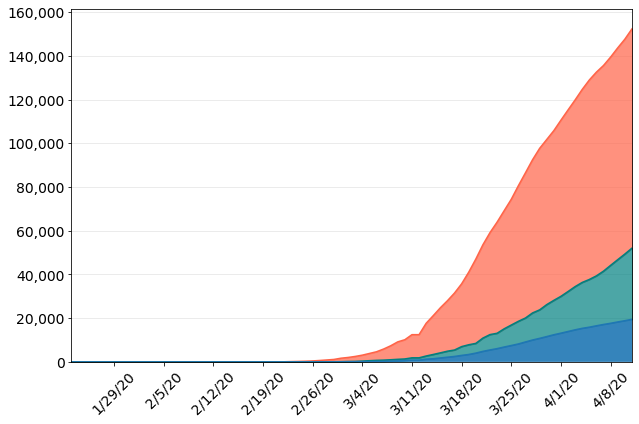

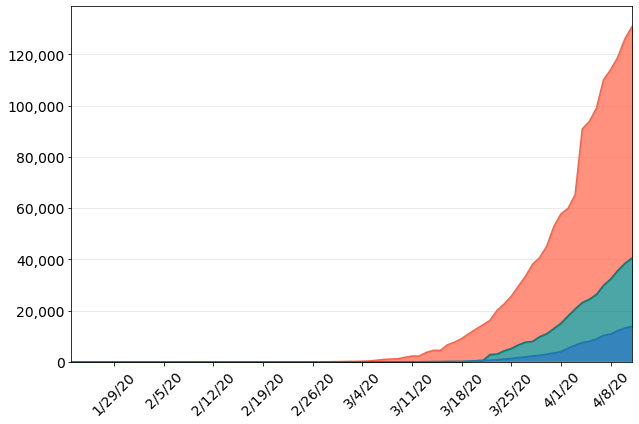

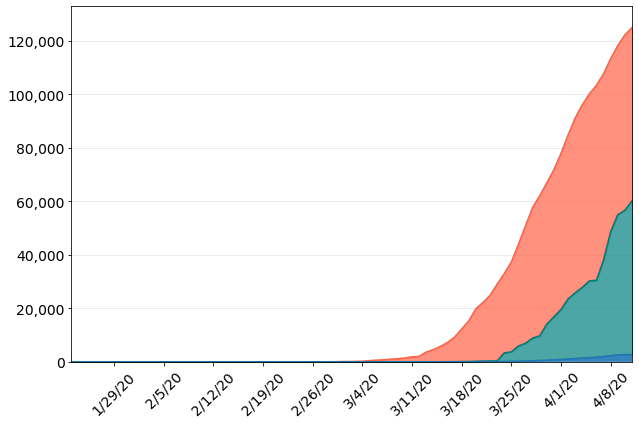

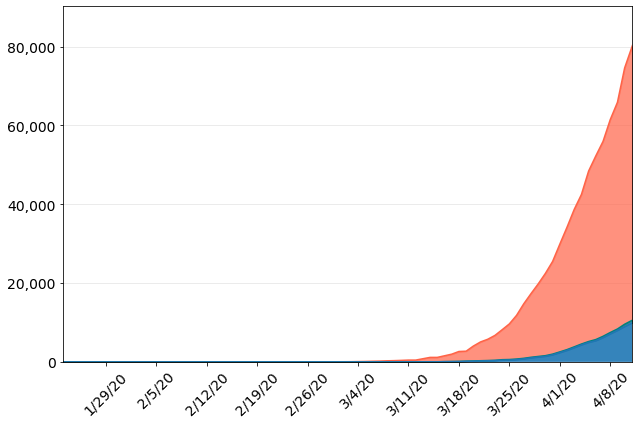

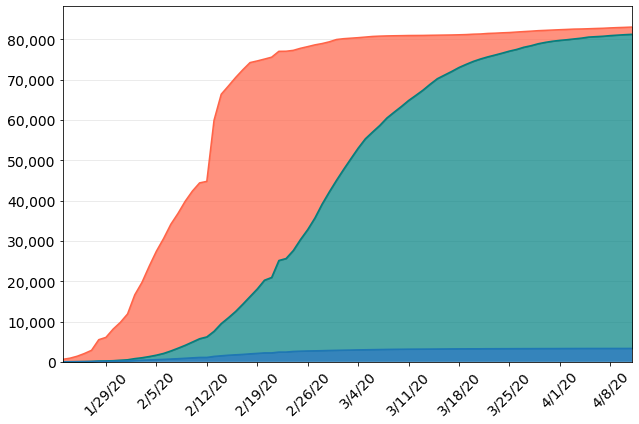

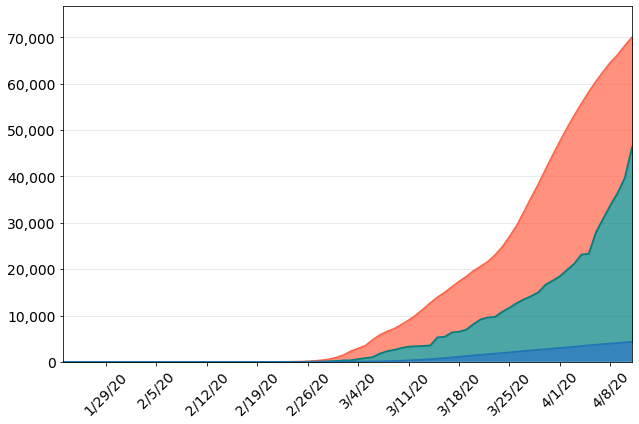

In [136]:
for i in range(len(top_confirmed_df)):
    country = top_confirmed_df.index[i]
    linechart_one(country)

#### Global Line Chart

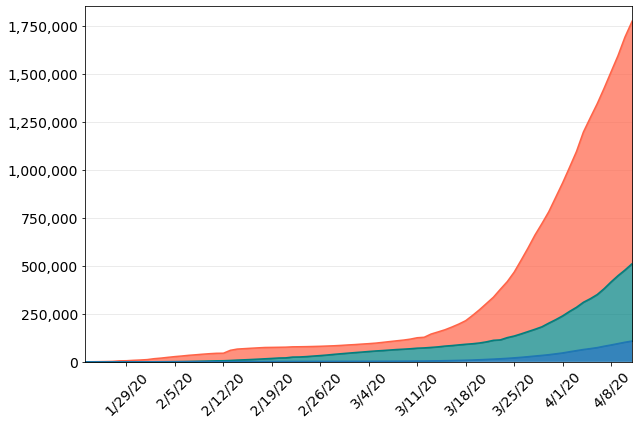

In [137]:
linechart_one('Global')

## Rate of Infection

In [147]:
def rate_of_change(df, country):

    # x-axis
    dates = df.columns.tolist()
    days = range(len(dates))

    # y-axis
    countries = list(first_infected_top.index)
    c_values = top_confirmed_df.loc[country,:].pct_change(periods=21)

    fig, ax = plt.subplots(figsize = (9,6))
#     plt.title(country)
    plt.ylabel("Rate of Change in Confirmed Cases")

    xticks = [day*7 for day in days]
    xlabels = dates[0::7]
    plt.xticks(xticks, xlabels, rotation=45)
    
    country_index = countries.index(country)
    c_color = color_index[country_index]
    
    ax.plot(dates, c_values, color = c_color, linestyle = '-', linewidth=2)

    plt.grid(axis='y')

    # Save image
    country = country.replace(' ', '').lower()
    saved_img = os.path.join('..', 'images',f'chart2_{country}.png')
    plt.savefig(saved_img, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

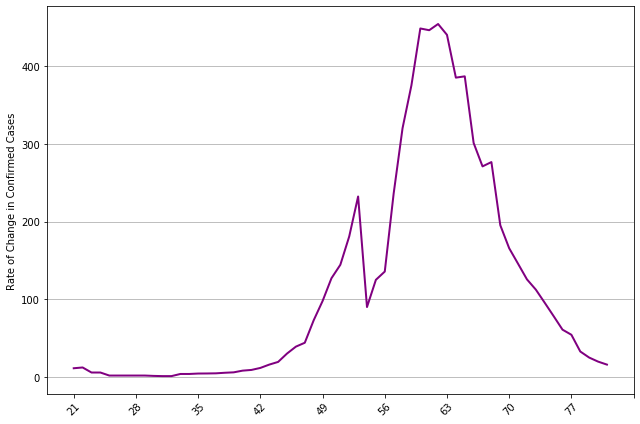

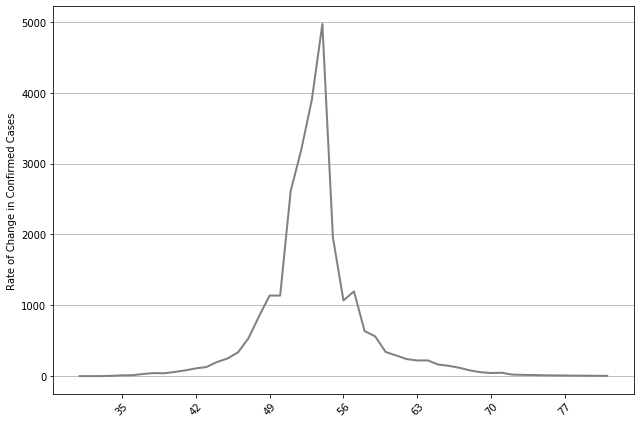

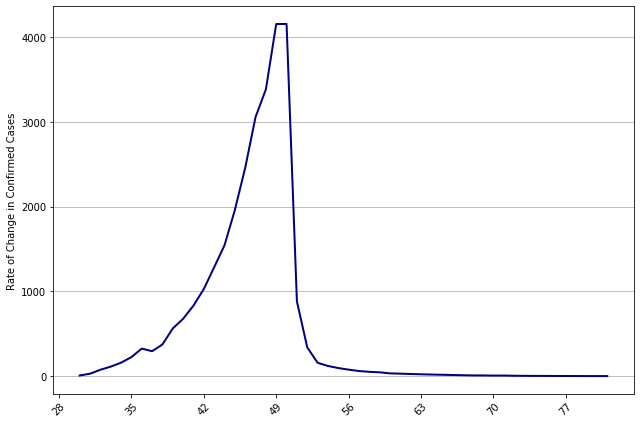

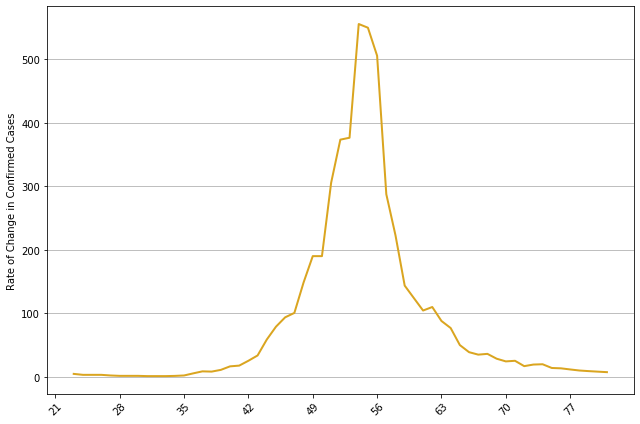

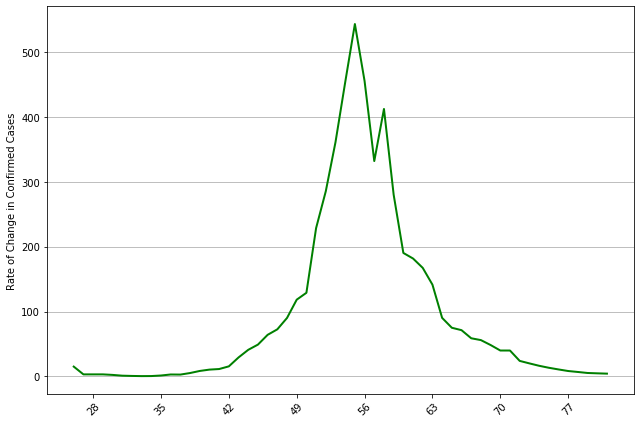

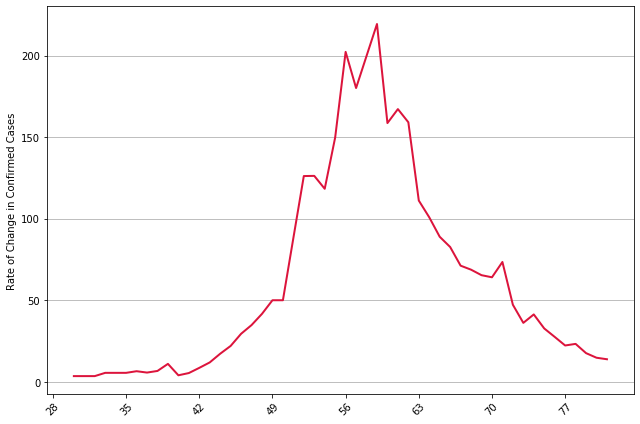

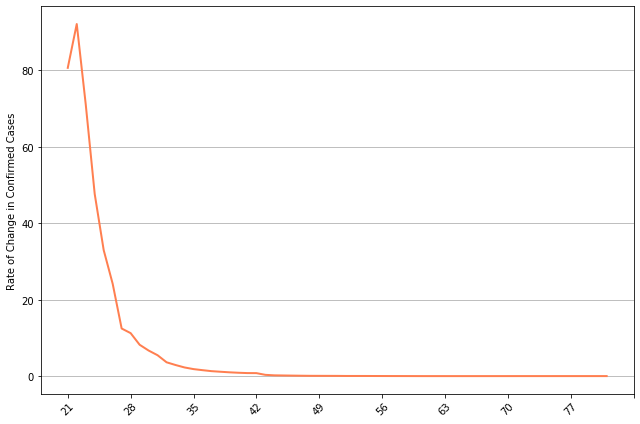

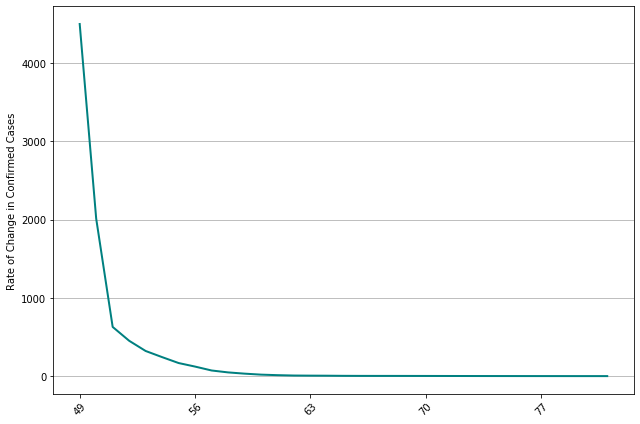

In [148]:
for i in range(len(top_confirmed_df)):
    country = top_confirmed_df.index[i]
    rate_of_change(first_confirmed_top, country)

### Confirmed Cases vs Fatalities (Bar Chart)

#### Global

In [ ]:
def barchart_one(country, c_df, f_df):

    # x-axis
    dates = c_df.columns.tolist()
    days = range(len(dates))

    # y-axis
    confirmed = c_df.loc[c_df.index == country]
    fatalities = f_df.loc[f_df.index == country]
    y1 = confirmed.iloc[0,:]
    y2 = fatalities.iloc[0,:]

    fig, ax = plt.subplots(figsize = (9,6))

    bar_width = 1
    rects1 = ax.bar(days, y1, bar_width, color='royalblue')
    rects2 = ax.bar(days, y2, bar_width, color='seagreen')

    plt.title(country, fontsize=14)
    plt.xlabel('Day', fontsize=14)
    xticks = [day*7 for day in days]
    xlabels = dates[0::7]
    plt.xticks(xticks, xlabels, rotation=45)
    plt.xlim(0, 84)
    plt.yticks(np.arange(0, 500000, step=50000))
    plt.ylim(0, 500000)
    ax.tick_params(axis='both', labelsize=14)

    ax.legend( (rects1[0], rects2[0]), ('Confirmed', 'Fatalities') )
    ax.set_axisbelow(True)
    plt.grid(axis='y', alpha=0.3)

    country_name = country.replace(' ', '').lower()
    saved_img = os.path.join('..', 'images',f'cvf_{country_name}.png')
    plt.savefig(saved_img)

    plt.tight_layout()
    plt.show()

#### By Country

In [ ]:
for i in range(len(top_confirmed_df)):
    country = top_confirmed_df.index[i]    
    barchart_one(country, top_confirmed_df, top_fatalities_df)
    
    country_name = country.replace(' ', '').lower()
    saved_img = os.path.join('..', 'images',f'cvf_{country_name}.png')